<a href="https://colab.research.google.com/github/guilhermefrrr/guilhermefrrr/blob/main/Modulo12_Modelo_de_Jogo_Grupo1_MBDAF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto elaborado para o Trabalho de Conclusão de Curso do Masters em Big Data Aplicado ao Futebol, do Sports Data Campus.

Ele tem como objetivo organizar os clubes das cinco pricipais ligas da Europa em clusters de acordo com seu estilo de jogo, usando dados de desempenho coletivos ao longo da temporada 2020/21.

Feito com dados do Wyscout.

**Apresentação e maiores detalhes do projeto [neste link](https://https://drive.google.com/file/d/1CK1jKdpHaiuAkZNilq9pktTv-YRHRMQH/view?usp=drive_link)**

# **MODELO DE JOGO - Guilherme Ferreira, Tiago Alves e Vinicius Incrocci**

#PREPARAÇÃO

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

> Começamos por ler o dataset com pandas e ver o que temos ao nosso dispor

In [ ]:
top5 = pd.read_csv('/content/drive/MyDrive/UCAM/tcc/Top5.csv')
top5.head(5)

,competitionid,teamid_x,general_shots_x,general_fouls_x,general_corners_x,general_redCards_x,general_yellowCards_x,general_offsides_x,general_dribbles_x,general_goals_x,...,duels_challengeIntensity_y,flanks_leftFlankAttacks_y,flanks_leftFlankXg_y,flanks_rightFlankAttacks_y,flanks_rightFlankXg_y,flanks_centerAttacks_y,flanks_centerXg_y,index,date,gameweek
0,795,674,4,23,1,1,6,3,21,1,...,7.2,11,0.109,38,1.126,20,0.483,674.524133,2021-08-13 21:00:00,1
1,795,674,18,12,6,0,2,3,20,1,...,7.7,14,0.610,11,0.496,6,0.000,674.524135,2021-08-21 19:30:00,2
2,795,674,9,20,4,0,1,2,19,3,...,7.8,16,0.099,19,0.139,10,0.059,674.524136,2021-08-27 22:15:00,3
3,795,674,11,14,4,0,2,2,32,4,...,8.4,19,0.387,13,0.207,9,0.179,674.524137,2021-09-12 16:15:00,4
4,795,674,11,13,2,0,1,0,26,1,...,7.5,8,0.197,25,0.896,17,0.469,674.524138,2021-09-19 21:00:00,5


In [ ]:
top5.shape

(3590, 293)

In [ ]:
top5.describe().columns

Index(['competitionid', 'teamid_x', 'general_shots_x', 'general_fouls_x',
       'general_corners_x', 'general_redCards_x', 'general_yellowCards_x',
       'general_offsides_x', 'general_dribbles_x', 'general_goals_x',
       ...
       'duels_dribblesSuccessful_y', 'duels_challengeIntensity_y',
       'flanks_leftFlankAttacks_y', 'flanks_leftFlankXg_y',
       'flanks_rightFlankAttacks_y', 'flanks_rightFlankXg_y',
       'flanks_centerAttacks_y', 'flanks_centerXg_y', 'index', 'gameweek'],
      dtype='object', length=292)

> Adicionamos métricas que entendemos serem interessantes e relevantes para a análise

In [ ]:
top5['attacks_counterAttacks_%_x'] = top5['attacks_counterAttacks_x'] / top5['attacks_total_x']
top5['attacks_counterAttacks_%_y'] = top5['attacks_counterAttacks_y'] / top5['attacks_total_y']
top5['passes_longPasses_%_x'] = top5['passes_longPasses_x'] / top5['passes_passes_x']
top5['passes_longPasses_%_y'] = top5['passes_longPasses_y'] / top5['passes_passes_y']
top5['flanks_centerAttacks_%_x'] = top5['flanks_centerAttacks_x'] / (top5['flanks_centerAttacks_x'] + top5['flanks_leftFlankAttacks_x'] + top5['flanks_rightFlankAttacks_x'])
top5['flanks_centerXg_%_x'] = top5['flanks_centerXg_x'] / (top5['flanks_centerXg_x'] + top5['flanks_leftFlankXg_x'] + top5['flanks_rightFlankXg_x'])
top5['flanks_centerXg_%_y'] = top5['flanks_centerXg_y'] / (top5['flanks_centerXg_y'] + top5['flanks_leftFlankXg_y'] + top5['flanks_rightFlankXg_y'])
top5['passes_per_shot'] = top5['passes_passes_x'] / top5['general_shots_x']
top5['flanks_Xg_x'] =  top5['flanks_leftFlankXg_x'] + top5['flanks_rightFlankXg_x']
top5['flanks_Xg_y'] =  top5['flanks_leftFlankXg_y'] + top5['flanks_rightFlankXg_y']

top5.head()

,competitionid,teamid_x,general_shots_x,general_fouls_x,general_corners_x,general_redCards_x,general_yellowCards_x,general_offsides_x,general_dribbles_x,general_goals_x,...,attacks_counterAttacks_%_x,attacks_counterAttacks_%_y,passes_longPasses_%_x,passes_longPasses_%_y,flanks_centerAttacks_%_x,flanks_centerXg_%_x,flanks_centerXg_%_y,passes_per_shot,flanks_Xg_x,flanks_Xg_y
0,795,674,4,23,1,1,6,3,21,1,...,0.208333,0.043478,0.192053,0.081081,0.333333,0.841639,0.281141,37.750000,0.143,1.235
1,795,674,18,12,6,0,2,3,20,1,...,0.093023,0.032258,0.229452,0.185654,0.279070,0.605307,0.000000,16.222222,0.952,1.106
2,795,674,9,20,4,0,1,2,19,3,...,0.151515,0.000000,0.161290,0.138329,0.333333,0.124510,0.198653,37.888889,1.786,0.238
3,795,674,11,14,4,0,2,2,32,4,...,0.153846,0.000000,0.182143,0.136476,0.307692,0.223720,0.231565,25.454545,0.576,0.594
4,795,674,11,13,2,0,1,0,26,1,...,0.056604,0.220000,0.120635,0.058161,0.320755,0.690562,0.300256,28.636364,0.259,1.093


> Adicionamos uma tabela com os nomes dos times, para melhor visualização e identificação

In [ ]:
times = pd.read_excel('/content/drive/MyDrive/UCAM/tcc/Teams_Top5.xlsx')
times.head(5)

,teamId,teamName,officialName,country
0,674.0,Valencia,Valencia CF,Spain
1,675.0,Real Madrid,Real Madrid Club de FÃºtbol,Spain
2,676.0,Barcelona,FC Barcelona,Spain
3,678.0,Athletic Bilbao,Athletic Club Bilbao,Spain
4,679.0,Atletico Madrid,Club AtlÃ©tico de Madrid,Spain


In [ ]:
times.shape

(98, 4)

> Unificamos as duas tabelas para termos os nomes dos times com todas as nossas variáveis disponíveis

In [ ]:
top5 = top5.merge(times, how='left', left_on='teamid_x', right_on='teamId')
top5

,competitionid,teamid_x,general_shots_x,general_fouls_x,general_corners_x,general_redCards_x,general_yellowCards_x,general_offsides_x,general_dribbles_x,general_goals_x,...,flanks_centerAttacks_%_x,flanks_centerXg_%_x,flanks_centerXg_%_y,passes_per_shot,flanks_Xg_x,flanks_Xg_y,teamId,teamName,officialName,country
0,795,674,4,23,1,1,6,3,21,1,...,0.333333,0.841639,0.281141,37.750000,0.143,1.235,674.0,Valencia,Valencia CF,Spain
1,795,674,18,12,6,0,2,3,20,1,...,0.279070,0.605307,0.000000,16.222222,0.952,1.106,674.0,Valencia,Valencia CF,Spain
2,795,674,9,20,4,0,1,2,19,3,...,0.333333,0.124510,0.198653,37.888889,1.786,0.238,674.0,Valencia,Valencia CF,Spain
3,795,674,11,14,4,0,2,2,32,4,...,0.307692,0.223720,0.231565,25.454545,0.576,0.594,674.0,Valencia,Valencia CF,Spain
4,795,674,11,13,2,0,1,0,26,1,...,0.320755,0.690562,0.300256,28.636364,0.259,1.093,674.0,Valencia,Valencia CF,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,412,19830,13,17,1,0,3,2,14,4,...,0.352941,0.571685,0.903093,27.769231,1.192,0.094,19830.0,Monaco,AS Monaco FC,Monaco
3586,412,19830,13,14,8,0,2,8,16,2,...,0.304348,0.550439,0.107042,27.692308,0.820,0.634,19830.0,Monaco,AS Monaco FC,Monaco
3587,412,19830,9,8,5,0,1,1,14,2,...,0.295455,0.120321,0.379668,46.888889,0.329,0.598,19830.0,Monaco,AS Monaco FC,Monaco
3588,412,19830,24,10,10,0,2,2,27,4,...,0.298507,0.450665,0.700991,19.583333,2.355,0.543,19830.0,Monaco,AS Monaco FC,Monaco


#MODELO DE TESTE

> Após alguns testes, nesse primeiro modelo, deixamos 52 features para ter uma primeira impressão e depois avançarmos para um modelo mais assertivo

In [ ]:
top5_modelo = top5[['teamName', 'general_shots_x', 'general_fouls_x', 'general_dribbles_x', 'general_goals_x', 'general_progressiveRuns_x',
                    'general_touchesInBox_x', 'general_foulsSuffered_x', 'possession_avgPossessionDuration_x',
                    'possession_totalTime_x', 'openplay_short_x', 'openplay_veryLong_x', 'attacks_total_x', 'attacks_positionalAttack_x',
                    'attacks_counterAttacks_x', 'transitions_recoveriesHigh_x', 'transitions_recoveriesMedium_x', 'transitions_recoveriesLow_x',
                    'transitions_ownHalfLosses_x', 'passes_passes_x', 'passes_progressivePasses_x', 'passes_passToFinalThirds_x', 'passes_avgPassLength_x',
                    'passes_matchTempo_x', 'defence_ppda_x', 'duels_aerialDuels_x', 'flanks_leftFlankAttacks_x', 'flanks_leftFlankXg_x',
                    'flanks_rightFlankAttacks_x', 'flanks_rightFlankXg_x', 'flanks_centerAttacks_x', 'flanks_centerXg_x', 'general_shots_y', 'general_offsides_y',
                    'general_goals_y', 'general_progressiveRuns_y', 'general_touchesInBox_y', 'possession_avgPossessionDuration_y',
                    'attacks_total_y', 'attacks_positionalAttack_y', 'attacks_counterAttacks_y', 'passes_passes_y',
                    'passes_avgPassLength_y', 'passes_matchTempo_y', 'flanks_leftFlankAttacks_y', 'flanks_leftFlankXg_y', 'flanks_rightFlankAttacks_y',
                    'flanks_rightFlankXg_y', 'flanks_centerAttacks_y', 'general_xg_x', 'general_xg_y',
                    'flanks_centerXg_y']]
top5_modelo.head()

,teamName,general_shots_x,general_fouls_x,general_dribbles_x,general_goals_x,general_progressiveRuns_x,general_touchesInBox_x,general_foulsSuffered_x,possession_avgPossessionDuration_x,possession_totalTime_x,...,passes_avgPassLength_y,passes_matchTempo_y,flanks_leftFlankAttacks_y,flanks_leftFlankXg_y,flanks_rightFlankAttacks_y,flanks_rightFlankXg_y,flanks_centerAttacks_y,general_xg_x,general_xg_y,flanks_centerXg_y
0,Valencia,4,23,21,1,7,5,16,0.116667,104,...,19.1,17.8,11,0.109,38,1.126,20,0.9034,1.7210,0.483
1,Valencia,18,12,20,1,10,15,14,0.150000,105,...,20.9,13.2,14,0.610,11,0.496,6,2.4130,1.1050,0.000
2,Valencia,9,20,19,3,11,16,15,0.200000,99,...,20.3,15.1,16,0.099,19,0.139,10,2.0400,0.2987,0.059
3,Valencia,11,14,32,4,11,15,20,0.166667,99,...,20.6,20.2,19,0.387,13,0.207,9,0.7440,0.7729,0.179
4,Valencia,11,13,26,1,16,14,13,0.200000,103,...,18.2,18.4,8,0.197,25,0.896,17,0.8386,1.5610,0.469


> Agrupamos pelo TeamName, pela média, assim conseguimos ter um time por linha

In [ ]:
from pandas.core.groupby import groupby
top5_modelo = (
    top5_modelo
    .groupby("teamName")
    .mean()
    .reset_index()
)
top5_modelo

,teamName,general_shots_x,general_fouls_x,general_dribbles_x,general_goals_x,general_progressiveRuns_x,general_touchesInBox_x,general_foulsSuffered_x,possession_avgPossessionDuration_x,possession_totalTime_x,...,passes_avgPassLength_y,passes_matchTempo_y,flanks_leftFlankAttacks_y,flanks_leftFlankXg_y,flanks_rightFlankAttacks_y,flanks_rightFlankXg_y,flanks_centerAttacks_y,general_xg_x,general_xg_y,flanks_centerXg_y
0,Angers SCO,9.789474,12.315789,36.657895,1.157895,15.894737,12.210526,11.921053,0.238597,95.684211,...,19.281579,17.310526,15.263158,0.367000,16.052632,0.333132,12.263158,1.277611,1.269726,0.568868
1,Arminia Bielefeld,10.088235,12.588235,24.529412,0.794118,10.264706,13.176471,8.911765,0.191176,96.058824,...,19.805882,17.267647,15.676471,0.443000,16.558824,0.632265,14.558824,0.987441,2.004429,0.928529
2,Arsenal,14.657143,9.485714,26.485714,1.571429,19.571429,21.914286,9.428571,0.273333,97.600000,...,19.294286,17.074286,13.085714,0.321600,12.400000,0.338857,10.628571,1.833277,1.230203,0.547029
3,Aston Villa,11.000000,10.555556,25.000000,1.333333,13.000000,17.722222,12.694444,0.208796,99.083333,...,19.877778,17.152778,15.250000,0.340639,14.611111,0.418500,12.361111,1.216589,1.399189,0.616278
4,Atalanta,14.432432,13.459459,31.432432,1.648649,18.162162,25.891892,11.864865,0.250000,96.378378,...,19.467568,17.175676,11.108108,0.234757,13.189189,0.286135,10.972973,1.800603,1.156224,0.614135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Villarreal,11.131579,12.342105,28.789474,1.657895,20.026316,22.421053,11.842105,0.284210,97.684211,...,20.402632,16.376316,12.842105,0.335211,14.157895,0.313842,9.763158,1.621211,1.182318,0.532474
94,Watford,9.941176,11.911765,27.529412,0.970588,11.323529,13.794118,8.676471,0.185294,97.823529,...,19.447059,17.514706,14.970588,0.414618,19.323529,0.597441,14.235294,1.025879,1.824621,0.812118
95,West Ham United,11.342105,8.526316,24.552632,1.578947,15.736842,18.500000,7.052632,0.241667,97.789474,...,19.026316,16.773684,15.894737,0.460553,14.184211,0.371763,13.552632,1.522468,1.655147,0.802579
96,Wolfsburg,11.470588,12.000000,24.470588,1.264706,12.588235,16.058824,12.205882,0.222549,95.676471,...,19.870588,17.411765,16.058824,0.431706,15.000000,0.347559,12.147059,1.427335,1.589174,0.809559


In [ ]:
top5_modelo.shape

(98, 52)

In [ ]:
# top5_modelo.to_excel("agrupadonovo3.xlsx")

In [ ]:
pd.set_option('display.max_rows', 98)
top5_modelo.isnull().sum()

teamName                              0
general_shots_x                       0
general_fouls_x                       0
general_dribbles_x                    0
general_goals_x                       0
general_progressiveRuns_x             0
general_touchesInBox_x                0
general_foulsSuffered_x               0
possession_avgPossessionDuration_x    0
possession_totalTime_x                0
openplay_short_x                      0
openplay_veryLong_x                   0
attacks_total_x                       0
attacks_positionalAttack_x            0
attacks_counterAttacks_x              0
transitions_recoveriesHigh_x          0
transitions_recoveriesMedium_x        0
transitions_recoveriesLow_x           0
transitions_ownHalfLosses_x           0
passes_passes_x                       0
passes_progressivePasses_x            0
passes_passToFinalThirds_x            0
passes_avgPassLength_x                0
passes_matchTempo_x                   0
defence_ppda_x                        0


> Não houve nulos com essas variáveis

> Retiramos indetificadores de times e normalizamos os nossos dados com Min Max

In [ ]:
from sklearn import preprocessing

top5_modelo_teamid = top5_modelo.teamName.tolist()

top5_modelo = top5_modelo.drop(['teamName'], axis = 1)

x = top5_modelo.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

> Usamos o PCA aqui como forma de reduzir as nossas dimensões. Podemos reduzir até uma só dimensão mas neste caso vamos escolher 2 para conseguirmos ver os dados nom plot 2D com os resultados do Kmeans

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
reduced = pd.DataFrame(pca.fit_transform(X_norm))
reduced

,0,1
0,-0.301565,0.413220
1,-1.338361,-0.085364
2,0.898702,0.244571
3,-0.406285,0.063256
4,1.269832,-0.285076
5,0.302950,-0.680590
6,0.494569,-0.269280
7,-1.048200,-0.184080
8,1.940172,-0.270287
9,0.284638,0.449003


> Agora que reduzimos as dimensões podemos fazer um plot dos nossos times e procurar relações

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


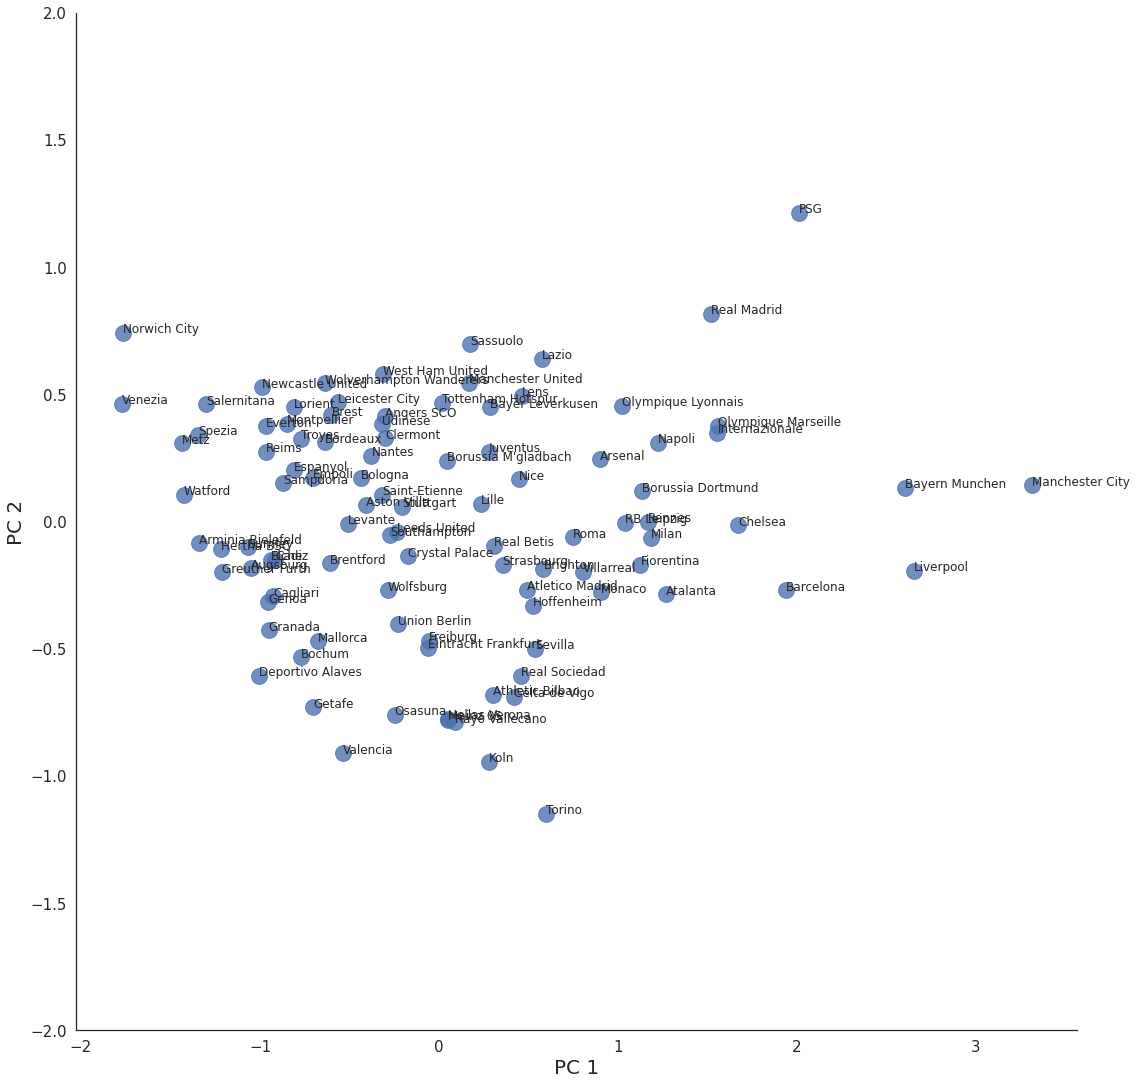

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="white")
reduced.columns = ['PC1','PC2']
ax = sns.lmplot(x='PC1', y='PC2', data = reduced, legend=False,
                   fit_reg=False, size = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.PC1, reduced.PC2, top5_modelo_teamid):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

> Agora seguimos para o método do cotovelo para definir o melhor número de clusters

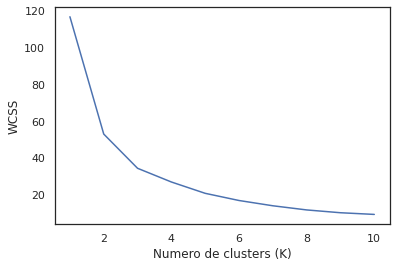

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(reduced)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Numero de clusters (K)')
plt.ylabel('WCSS')
plt.show()

> A partir do gráfico, o mais indicado parece ser 5 clusters

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(reduced)

labels = kmeans.predict(reduced)
clusters = kmeans.labels_.tolist()

> Depois do treino e depois de usar o modelo treinado, cada um dos times do dataset tem agora um número de 0 a 4 que representa o seu cluster.
Vamos colocar essa informação no nosso dataset reduced para depois fazer um plot com os resultados do KMeans

In [ ]:
reduced['cluster'] = clusters
reduced['name'] = top5_modelo_teamid
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-0.301565,0.413220,2,Angers SCO
1,-1.338361,-0.085364,0,Arminia Bielefeld
2,0.898702,0.244571,1,Arsenal
3,-0.406285,0.063256,2,Aston Villa
4,1.269832,-0.285076,1,Atalanta


> Neste plot cada cor representa um cluster, agrupando jogadores e facilitando a análise

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


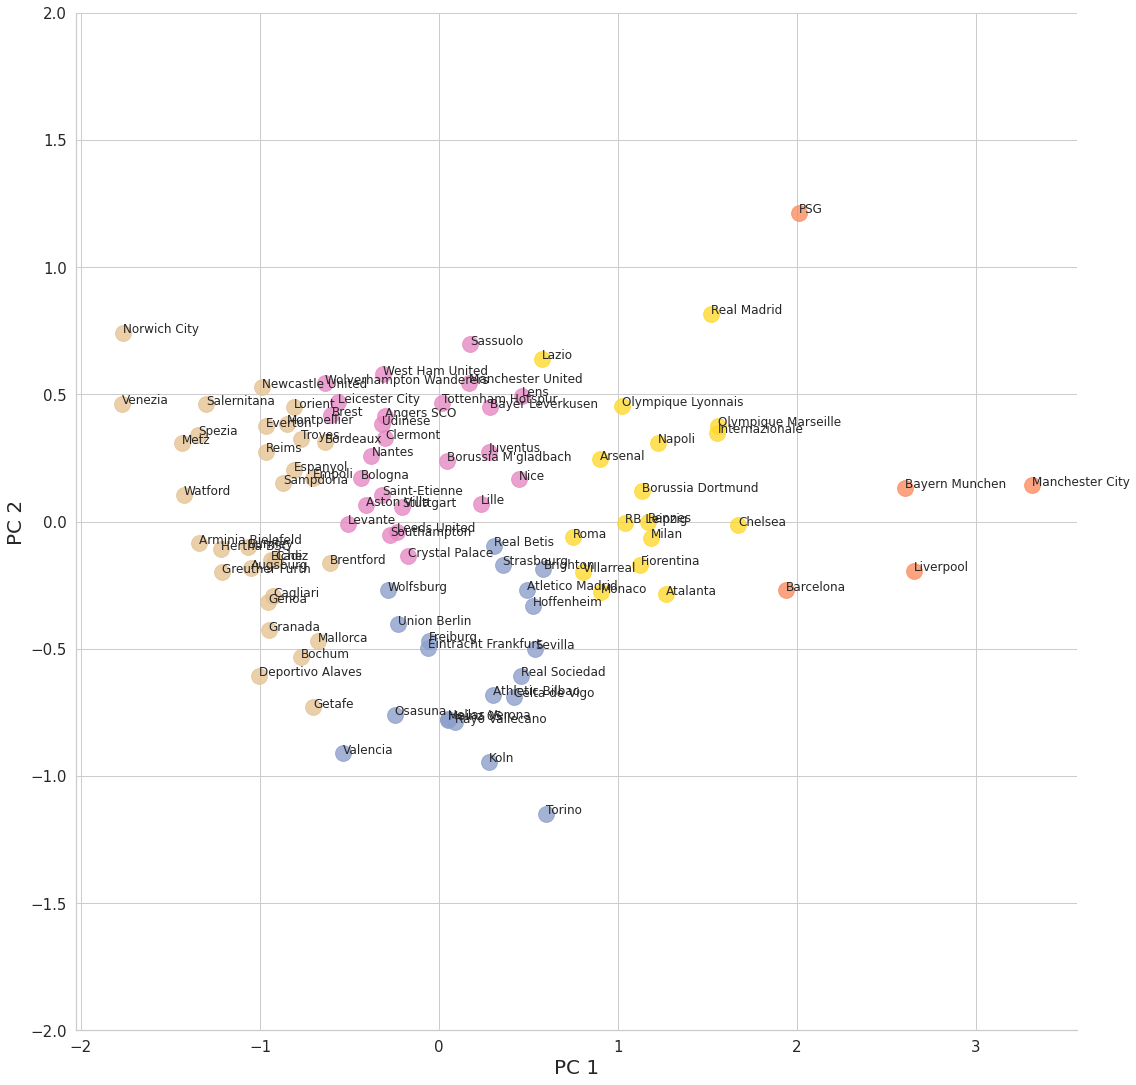

In [ ]:
sns.set(style="whitegrid")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, size = 15, scatter_kws={"s": 250}, palette = "Set2_r")

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

> É um esboço inicial relativamente interessante, mas há muitos pontos de contatos entre os cluster. Podemos ter um modelo melhor

> Ainda assim, vamos fazer um gráfico 3D para essa base, assim voltamos ao PCA, agora com 3 dimensões

In [ ]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components = 3)
reduced2 = pd.DataFrame(pca2.fit_transform(X_norm))
reduced2

,0,1,2
0,-0.301565,0.413220,-0.521544
1,-1.338361,-0.085364,0.497873
2,0.898702,0.244571,-0.152036
3,-0.406285,0.063256,-0.427284
4,1.269832,-0.285076,0.223923
5,0.302950,-0.680590,-0.229033
6,0.494569,-0.269280,-0.690623
7,-1.048200,-0.184080,0.266146
8,1.940172,-0.270287,-0.278824
9,0.284638,0.449003,0.538424


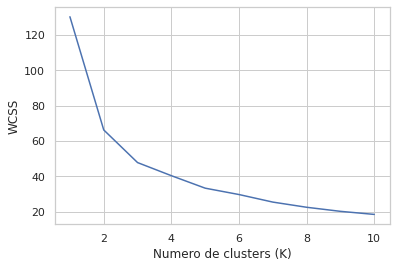

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(reduced2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Numero de clusters (K)')
plt.ylabel('WCSS')
plt.show()

> Seguimos com 5 clusters

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(reduced2)

labels = kmeans.predict(reduced2)
clusters = kmeans.labels_.tolist()

In [ ]:
reduced2['cluster'] = clusters
reduced2['name'] = top5_modelo_teamid
reduced2.columns = ['x', 'y', 'z', 'cluster', 'name']
reduced2.head()

,x,y,z,cluster,name
0,-0.301565,0.413220,-0.521544,1,Angers SCO
1,-1.338361,-0.085364,0.497873,3,Arminia Bielefeld
2,0.898702,0.244571,-0.152036,4,Arsenal
3,-0.406285,0.063256,-0.427284,1,Aston Villa
4,1.269832,-0.285076,0.223923,4,Atalanta


In [ ]:
import plotly.express as px
fig = px.scatter_3d(reduced2, x='x', y='y', z='z',
              color='cluster', hover_name='name')
fig.show()

> O Gráfico ajudou a perceber os grupos, mesmo sabendo que não era o modelo final

> Para melhorar o próximo modelo testado, fizemos uma tabela de correlações, para avaliação de métricas que pouco influenciaram ou outras que estão influenciando conjuntamente com outra, o que desbalancearia o modelo

In [ ]:
import seaborn as sns
top5_modelo.corr()

,general_shots_x,general_fouls_x,general_dribbles_x,general_goals_x,general_progressiveRuns_x,general_touchesInBox_x,general_foulsSuffered_x,possession_avgPossessionDuration_x,possession_totalTime_x,openplay_short_x,...,passes_avgPassLength_y,passes_matchTempo_y,flanks_leftFlankAttacks_y,flanks_leftFlankXg_y,flanks_rightFlankAttacks_y,flanks_rightFlankXg_y,flanks_centerAttacks_y,general_xg_x,general_xg_y,flanks_centerXg_y
general_shots_x,1.000000,-0.323030,0.443446,0.804721,0.748607,0.902786,-0.158532,0.706030,-0.164331,-0.610007,...,-0.072807,-0.086789,-0.674992,-0.440085,-0.726608,-0.457335,-0.606818,0.902118,-0.513799,-0.456689
general_fouls_x,-0.323030,1.000000,-0.225074,-0.377973,-0.351977,-0.352856,0.475277,-0.452831,0.108925,0.378863,...,0.221053,-0.392328,0.184617,0.052126,0.197400,0.062893,0.153858,-0.336335,0.078516,0.081363
general_dribbles_x,0.443446,-0.225074,1.000000,0.371624,0.698777,0.385292,0.062217,0.489117,-0.026768,-0.472439,...,-0.240774,0.043187,-0.364228,-0.277303,-0.272471,-0.202073,-0.291212,0.366080,-0.284188,-0.260050
general_goals_x,0.804721,-0.377973,0.371624,1.000000,0.698315,0.854290,-0.182556,0.769575,-0.286710,-0.677805,...,-0.028368,-0.006112,-0.681252,-0.372509,-0.722371,-0.506497,-0.648353,0.893079,-0.540098,-0.519033
general_progressiveRuns_x,0.748607,-0.351977,0.698777,0.698315,1.000000,0.766545,-0.129535,0.851400,-0.064599,-0.806783,...,-0.152546,-0.112001,-0.630185,-0.428918,-0.638779,-0.458755,-0.612877,0.705951,-0.515487,-0.472170
general_touchesInBox_x,0.902786,-0.352856,0.385292,0.854290,0.766545,1.000000,-0.196380,0.779797,-0.132748,-0.666889,...,0.058602,-0.129228,-0.747285,-0.489249,-0.815764,-0.589290,-0.700185,0.928475,-0.594319,-0.507297
general_foulsSuffered_x,-0.158532,0.475277,0.062217,-0.182556,-0.129535,-0.196380,1.000000,-0.098782,0.097345,-0.039442,...,0.171320,-0.130848,0.100096,0.040289,0.028260,-0.053498,-0.018311,-0.187349,-0.029920,-0.049146
possession_avgPossessionDuration_x,0.706030,-0.452831,0.489117,0.769575,0.851400,0.779797,-0.098782,1.000000,-0.182681,-0.927738,...,-0.091793,-0.070850,-0.706951,-0.437076,-0.758900,-0.572758,-0.735709,0.750676,-0.602061,-0.564368
possession_totalTime_x,-0.164331,0.108925,-0.026768,-0.286710,-0.064599,-0.132748,0.097345,-0.182681,1.000000,0.056751,...,0.124880,-0.341257,0.176668,-0.117140,0.128210,0.008350,0.046922,-0.248622,-0.025867,0.004185
openplay_short_x,-0.610007,0.378863,-0.472439,-0.677805,-0.806783,-0.666889,-0.039442,-0.927738,0.056751,1.000000,...,0.204947,0.059476,0.586398,0.369455,0.662970,0.495971,0.652538,-0.645009,0.531167,0.517405


In [ ]:
top5_modelo_corr = top5_modelo.corr()

In [ ]:
top5_modelo_corr.head()

,general_shots_x,general_fouls_x,general_dribbles_x,general_goals_x,general_progressiveRuns_x,general_touchesInBox_x,general_foulsSuffered_x,possession_avgPossessionDuration_x,possession_totalTime_x,openplay_short_x,...,passes_avgPassLength_y,passes_matchTempo_y,flanks_leftFlankAttacks_y,flanks_leftFlankXg_y,flanks_rightFlankAttacks_y,flanks_rightFlankXg_y,flanks_centerAttacks_y,general_xg_x,general_xg_y,flanks_centerXg_y
general_shots_x,1.000000,-0.323030,0.443446,0.804721,0.748607,0.902786,-0.158532,0.706030,-0.164331,-0.610007,...,-0.072807,-0.086789,-0.674992,-0.440085,-0.726608,-0.457335,-0.606818,0.902118,-0.513799,-0.456689
general_fouls_x,-0.323030,1.000000,-0.225074,-0.377973,-0.351977,-0.352856,0.475277,-0.452831,0.108925,0.378863,...,0.221053,-0.392328,0.184617,0.052126,0.197400,0.062893,0.153858,-0.336335,0.078516,0.081363
general_dribbles_x,0.443446,-0.225074,1.000000,0.371624,0.698777,0.385292,0.062217,0.489117,-0.026768,-0.472439,...,-0.240774,0.043187,-0.364228,-0.277303,-0.272471,-0.202073,-0.291212,0.366080,-0.284188,-0.260050
general_goals_x,0.804721,-0.377973,0.371624,1.000000,0.698315,0.854290,-0.182556,0.769575,-0.286710,-0.677805,...,-0.028368,-0.006112,-0.681252,-0.372509,-0.722371,-0.506497,-0.648353,0.893079,-0.540098,-0.519033
general_progressiveRuns_x,0.748607,-0.351977,0.698777,0.698315,1.000000,0.766545,-0.129535,0.851400,-0.064599,-0.806783,...,-0.152546,-0.112001,-0.630185,-0.428918,-0.638779,-0.458755,-0.612877,0.705951,-0.515487,-0.472170


In [ ]:
# top5_modelo_corr.to_excel("correlações3.xlsx")

> Essa tabela e suas vizualizações nos ajudaram a avançar para um modelo que se mostrou mais apropriado

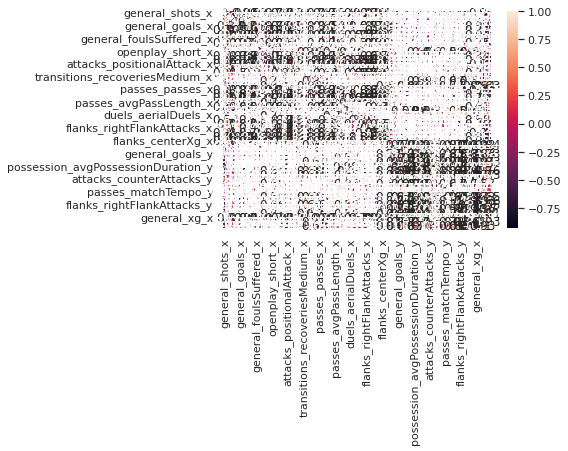

In [ ]:
sns.heatmap(top5_modelo.corr(), annot=True)

#MODELO FINAL

> Após o primeiro modelo e outros testes, avançamos para o modelo que mais refletiou o interesse de estudo do grupo

> Optamos por retirar algumas variáveis e adicionar outras, entre as calculadas na fase de preparação, ficando com 38 no total

In [ ]:
top5_modelo2 = top5[['teamName', 'general_shots_x', 'general_fouls_x', 'general_dribbles_x', 'general_goals_x', 'general_progressiveRuns_x',
                    'general_foulsSuffered_x', 'possession_avgPossessionDuration_x',
                    'openplay_short_x', 'openplay_veryLong_x',
                    'transitions_recoveriesHigh_x', 'transitions_recoveriesMedium_x', 'transitions_recoveriesLow_x',
                    'transitions_ownHalfLosses_x', 'passes_progressivePasses_x', 'passes_avgPassLength_x',
                    'passes_matchTempo_x', 'defence_ppda_x', 'duels_aerialDuels_x',
                    'flanks_Xg_x', 'flanks_centerAttacks_%_x', 'flanks_centerXg_%_x', 'general_offsides_y',
                    'general_goals_y', 'general_progressiveRuns_y', 'general_touchesInBox_y', 'possession_avgPossessionDuration_y',
                    'passes_avgPassLength_y', 'passes_matchTempo_y', 'flanks_Xg_y', 'passes_longPasses_%_x', 'passes_longPasses_%_y',
                    'flanks_centerXg_%_y', 'attacks_counterAttacks_%_x', 'attacks_counterAttacks_%_y',
                    'flanks_leftFlankAttacks_x', 'flanks_rightFlankAttacks_x', 'passes_per_shot']]

top5_modelo2.head()

,teamName,general_shots_x,general_fouls_x,general_dribbles_x,general_goals_x,general_progressiveRuns_x,general_foulsSuffered_x,possession_avgPossessionDuration_x,openplay_short_x,openplay_veryLong_x,...,passes_matchTempo_y,flanks_Xg_y,passes_longPasses_%_x,passes_longPasses_%_y,flanks_centerXg_%_y,attacks_counterAttacks_%_x,attacks_counterAttacks_%_y,flanks_leftFlankAttacks_x,flanks_rightFlankAttacks_x,passes_per_shot
0,Valencia,4,23,21,1,7,16,0.116667,50,0,...,17.8,1.235,0.192053,0.081081,0.281141,0.208333,0.043478,4,12,37.750000
1,Valencia,18,12,20,1,10,14,0.150000,48,0,...,13.2,1.106,0.229452,0.185654,0.000000,0.093023,0.032258,8,23,16.222222
2,Valencia,9,20,19,3,11,15,0.200000,45,4,...,15.1,0.238,0.161290,0.138329,0.198653,0.151515,0.000000,12,10,37.888889
3,Valencia,11,14,32,4,11,20,0.166667,53,1,...,20.2,0.594,0.182143,0.136476,0.231565,0.153846,0.000000,15,12,25.454545
4,Valencia,11,13,26,1,16,13,0.200000,51,2,...,18.4,1.093,0.120635,0.058161,0.300256,0.056604,0.220000,20,16,28.636364


> Agrupamos pelo TeamName, pela média, assim conseguimos ter um time por linha

In [ ]:
from pandas.core.groupby import groupby
top5_modelo2 = (
    top5_modelo2
    .groupby("teamName")
    .mean()
    .reset_index()
)
top5_modelo2

,teamName,general_shots_x,general_fouls_x,general_dribbles_x,general_goals_x,general_progressiveRuns_x,general_foulsSuffered_x,possession_avgPossessionDuration_x,openplay_short_x,openplay_veryLong_x,...,passes_matchTempo_y,flanks_Xg_y,passes_longPasses_%_x,passes_longPasses_%_y,flanks_centerXg_%_y,attacks_counterAttacks_%_x,attacks_counterAttacks_%_y,flanks_leftFlankAttacks_x,flanks_rightFlankAttacks_x,passes_per_shot
0,Angers SCO,9.789474,12.315789,36.657895,1.157895,15.894737,11.921053,0.238597,41.026316,3.894737,...,17.310526,0.700132,0.089883,0.098950,0.418731,0.079103,0.041615,13.526316,14.184211,51.282475
1,Arminia Bielefeld,10.088235,12.588235,24.529412,0.794118,10.264706,8.911765,0.191176,51.235294,2.294118,...,17.267647,1.075265,0.159522,0.110129,0.430430,0.076856,0.057708,12.117647,13.352941,38.126656
2,Arsenal,14.657143,9.485714,26.485714,1.571429,19.571429,9.428571,0.273333,35.628571,6.285714,...,17.074286,0.660457,0.091146,0.115214,0.392831,0.050548,0.071961,14.742857,15.800000,NaN
3,Aston Villa,11.000000,10.555556,25.000000,1.333333,13.000000,12.694444,0.208796,41.055556,2.888889,...,17.152778,0.759139,0.120307,0.104313,0.407168,0.049320,0.067338,15.694444,11.305556,36.610979
4,Atalanta,14.432432,13.459459,31.432432,1.648649,18.162162,11.864865,0.250000,38.864865,4.486486,...,17.175676,0.520892,0.085455,0.130742,0.497245,0.058368,0.092299,17.945946,15.945946,39.329363
5,Athletic Bilbao,11.605263,12.657895,27.000000,1.131579,13.078947,12.421053,0.199123,47.421053,2.236842,...,16.889474,0.566711,0.119948,0.143849,0.394723,0.072101,0.062269,14.131579,19.026316,37.747315
6,Atletico Madrid,11.500000,12.473684,25.921053,1.710526,13.236842,12.973684,0.235526,36.763158,3.473684,...,17.071053,0.459211,0.105664,0.114724,0.451054,0.058423,0.050922,14.710526,15.710526,42.054954
7,Augsburg,10.205882,13.088235,22.764706,1.147059,9.382353,10.235294,0.180392,50.911765,1.617647,...,17.597059,0.902206,0.160476,0.102221,0.424489,0.070033,0.047825,12.323529,14.617647,35.862857
8,Barcelona,13.027027,13.108108,34.540541,1.837838,22.081081,12.648649,0.321171,28.648649,7.216216,...,16.651351,0.539216,0.071105,0.140231,0.431062,0.046125,0.086110,18.216216,16.486486,52.489364
9,Bayer Leverkusen,12.852941,10.676471,30.852941,2.352941,17.794118,9.529412,0.251471,40.117647,4.882353,...,17.370588,0.802441,0.093445,0.114700,0.440538,0.125131,0.066886,12.529412,13.911765,40.792365


In [ ]:
top5_modelo2.shape

(98, 38)

In [ ]:
# top5_modelo2.to_excel("agrupado2novo3.xlsx")

In [ ]:
pd.set_option('display.max_rows', 98)
top5_modelo2.isnull().sum()

teamName                              0
general_shots_x                       0
general_fouls_x                       0
general_dribbles_x                    0
general_goals_x                       0
general_progressiveRuns_x             0
general_foulsSuffered_x               0
possession_avgPossessionDuration_x    0
openplay_short_x                      0
openplay_veryLong_x                   0
transitions_recoveriesHigh_x          0
transitions_recoveriesMedium_x        0
transitions_recoveriesLow_x           0
transitions_ownHalfLosses_x           0
passes_progressivePasses_x            0
passes_avgPassLength_x                0
passes_matchTempo_x                   0
defence_ppda_x                        0
duels_aerialDuels_x                   0
flanks_Xg_x                           0
flanks_centerAttacks_%_x              0
flanks_centerXg_%_x                   0
general_offsides_y                    0
general_goals_y                       0
general_progressiveRuns_y             0


> Optamos por utilizar o zero para subsituir os valores nulos no "passes_per_shot" (são partidas em que o time não conseguiu nenhuma finalização)

In [ ]:
zero_columns = ['passes_per_shot']

top5_modelo2[zero_columns] = top5_modelo2[zero_columns].fillna(0)
top5_modelo2.isnull().sum()

teamName                              0
general_shots_x                       0
general_fouls_x                       0
general_dribbles_x                    0
general_goals_x                       0
general_progressiveRuns_x             0
general_foulsSuffered_x               0
possession_avgPossessionDuration_x    0
openplay_short_x                      0
openplay_veryLong_x                   0
transitions_recoveriesHigh_x          0
transitions_recoveriesMedium_x        0
transitions_recoveriesLow_x           0
transitions_ownHalfLosses_x           0
passes_progressivePasses_x            0
passes_avgPassLength_x                0
passes_matchTempo_x                   0
defence_ppda_x                        0
duels_aerialDuels_x                   0
flanks_Xg_x                           0
flanks_centerAttacks_%_x              0
flanks_centerXg_%_x                   0
general_offsides_y                    0
general_goals_y                       0
general_progressiveRuns_y             0


> Retiramos indetificadores de times e normalizamos os nossos dados com Min Max

In [ ]:
from sklearn import preprocessing

top5_modelo2_teamid = top5_modelo2.teamName.tolist()

top5_modelo2 = top5_modelo2.drop(['teamName'], axis = 1)

x = top5_modelo2.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

> Usamos o PCA aqui como forma de reduzir as nossas dimensões. Podemos reduzir até uma só dimensão mas neste caso vamos escolher 2 para conseguirmos ver os dados nom plot 2D com os resultados do Kmeans

In [ ]:
from sklearn.decomposition import PCA

pca3 = PCA(n_components = 2)
reduced3 = pd.DataFrame(pca3.fit_transform(X_norm))
reduced3

,0,1
0,-0.143092,-0.516118
1,-0.989901,0.186668
2,0.617701,-0.244775
3,-0.242769,-0.223600
4,0.922947,0.393027
5,0.117748,0.710529
6,0.289607,0.054602
7,-0.872190,0.256666
8,1.480757,0.289431
9,0.293530,-0.298108


> Agora que reduzimos as dimensões podemos fazer um plot dos nossos times e procurar relações

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



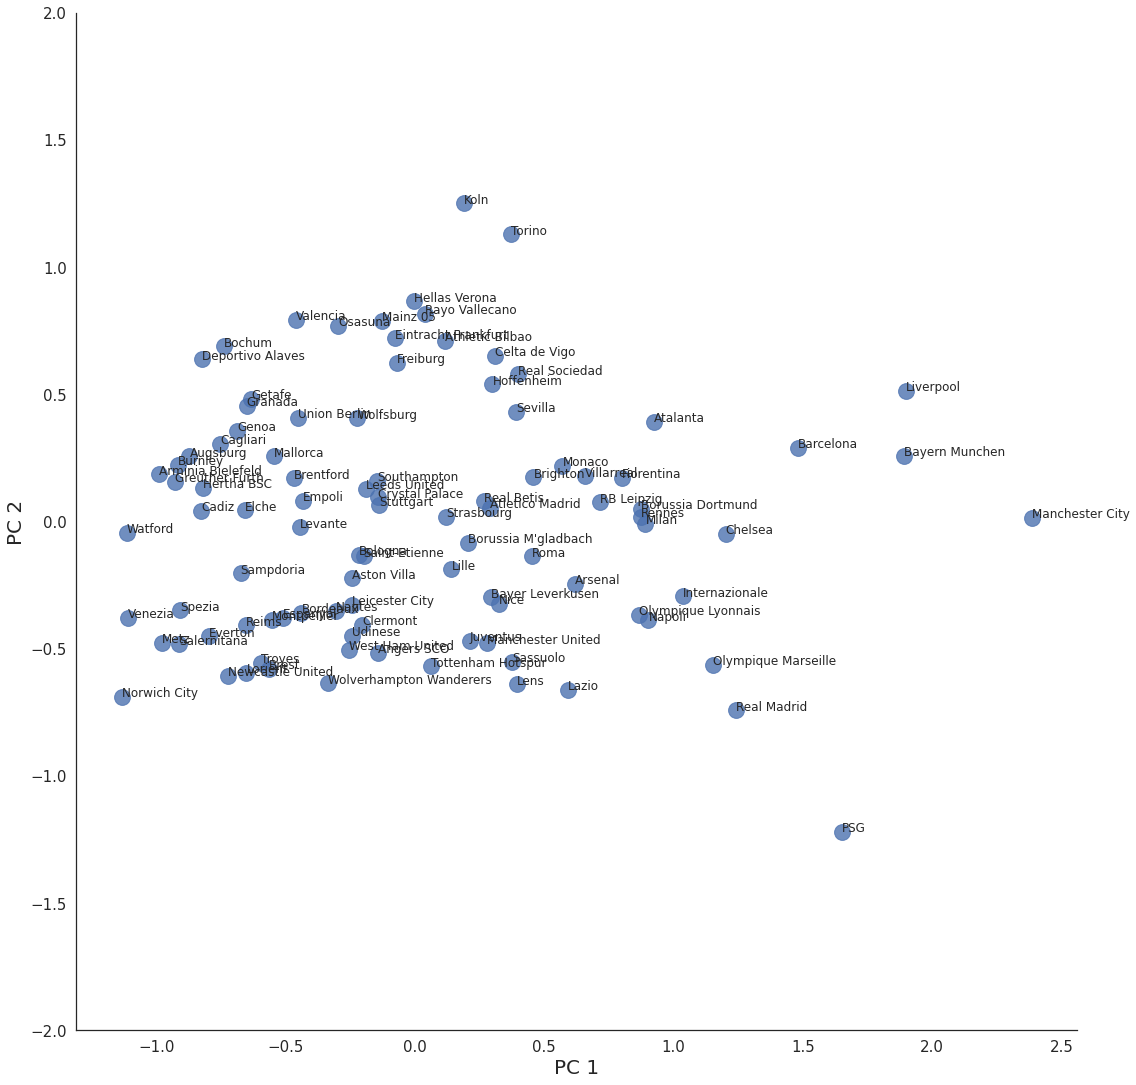

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="white")
reduced3.columns = ['PC1','PC2']
ax = sns.lmplot(x='PC1', y='PC2', data = reduced3, legend=False,
                   fit_reg=False, size = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced3.PC1, reduced3.PC2, top5_modelo2_teamid):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

> Agora seguimos para o método do cotovelo para definir o melhor número de clusters

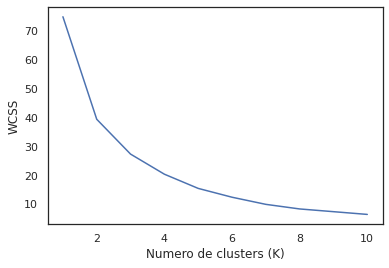

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(reduced3)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Numero de clusters (K)')
plt.ylabel('WCSS')
plt.show()

> A partir do gráfico, o mais indicado parece ser 5 clusters

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(reduced3)

labels = kmeans.predict(reduced3)
clusters = kmeans.labels_.tolist()

> Depois do treino e depois de usar o modelo treinado, cada um dos times do dataset tem agora um número de 0 a 4 que representa o seu cluster.
Vamos colocar essa informação no nosso dataset reduced para depois fazer um plot com os resultados do KMeans

In [ ]:
reduced3['cluster'] = clusters
reduced3['name'] = top5_modelo2_teamid
reduced3.columns = ['x', 'y', 'cluster', 'name']
reduced3.head()

,x,y,cluster,name
0,-0.143092,-0.516118,1,Angers SCO
1,-0.989901,0.186668,4,Arminia Bielefeld
2,0.617701,-0.244775,0,Arsenal
3,-0.242769,-0.223600,1,Aston Villa
4,0.922947,0.393027,0,Atalanta


In [ ]:
# reduced3.to_excel("reduced3_novo.xlsx")

> Neste plot cada cor representa um cluster, agrupando jogadores e facilitando a análise

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



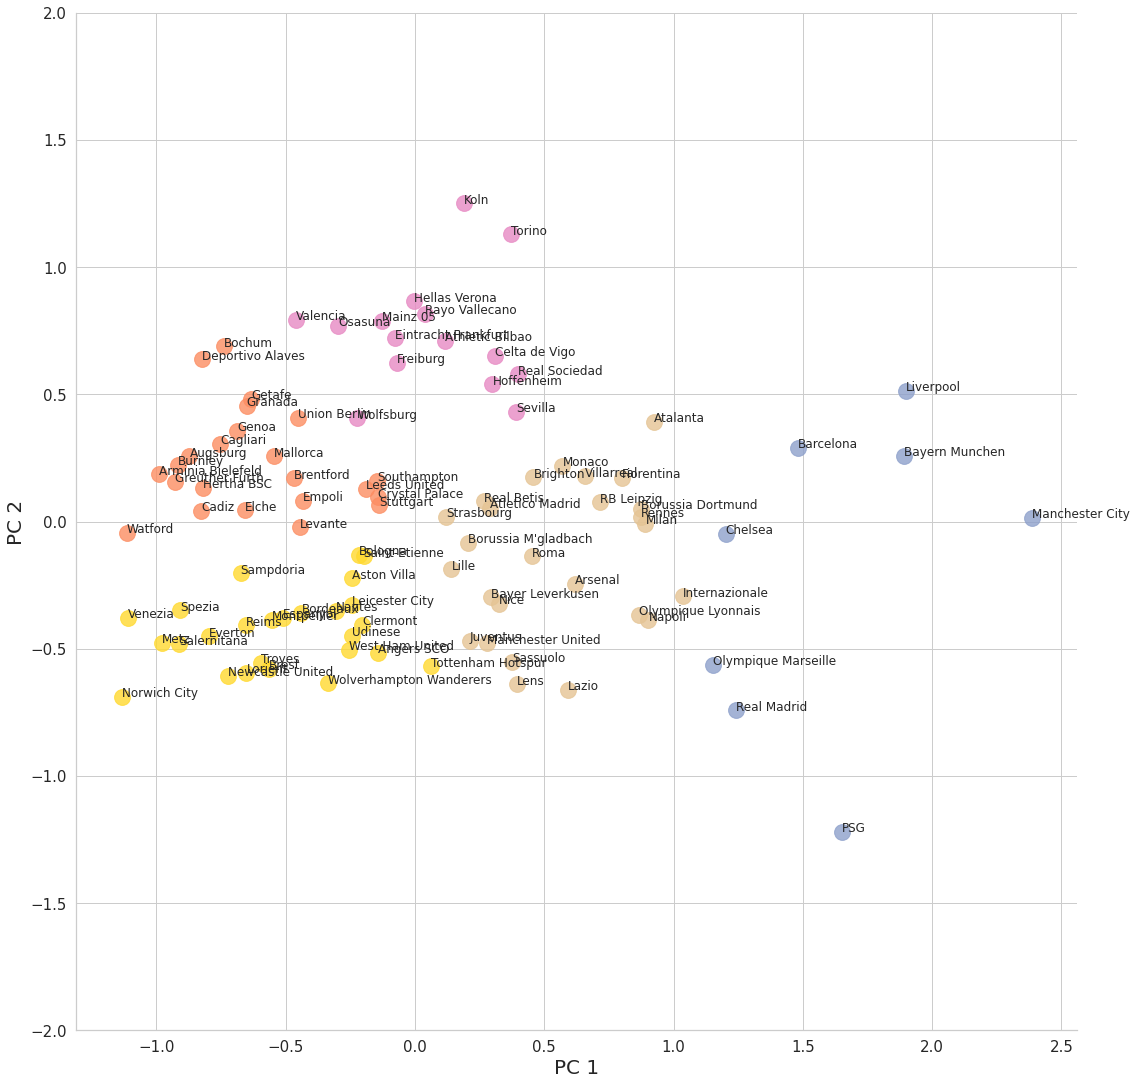

In [ ]:
sns.set(style="whitegrid")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced3, legend=False,
                   fit_reg=False, size = 15, scatter_kws={"s": 250}, palette = "Set2_r")

texts = []
for x, y, s in zip(reduced3.x, reduced3.y, reduced3.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

> Esse gráfico mostra uma boa efetividade do modelo. Os grupos tem espaços bem definidos nas fronteiras, o que nos possibilita marcar características para facilitar a definição do modelo de jogo de cada grupo, objetivo principal desse trabalho

> Vamos para o gráfico 3D, que pode nos ajudar na análise. Aqui temos o PCA com 3 dimensões

In [ ]:
from sklearn.decomposition import PCA

pca3 = PCA(n_components = 3)
reduced4 = pd.DataFrame(pca3.fit_transform(X_norm))
reduced4

,0,1,2
0,-0.143092,-0.516118,0.361166
1,-0.989901,0.186668,-0.380859
2,0.617701,-0.244775,-0.006436
3,-0.242769,-0.223600,0.270790
4,0.922947,0.393027,-0.176010
5,0.117748,0.710529,0.193572
6,0.289607,0.054602,0.211665
7,-0.872190,0.256666,-0.055278
8,1.480757,0.289431,0.429569
9,0.293530,-0.298108,-0.598401


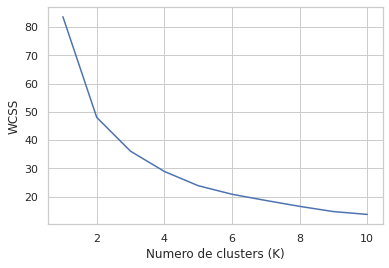

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(reduced4)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Numero de clusters (K)')
plt.ylabel('WCSS')
plt.show()

> Seguimos com 5 clusters

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(reduced4)

labels = kmeans.predict(reduced4)
clusters = kmeans.labels_.tolist()

In [ ]:
reduced4['cluster'] = clusters
reduced4['name'] = top5_modelo2_teamid
reduced4.columns = ['x', 'y', 'z', 'cluster', 'name']
reduced4.head()

,x,y,z,cluster,name
0,-0.143092,-0.516118,0.361166,2,Angers SCO
1,-0.989901,0.186668,-0.380859,1,Arminia Bielefeld
2,0.617701,-0.244775,-0.006436,0,Arsenal
3,-0.242769,-0.223600,0.270790,2,Aston Villa
4,0.922947,0.393027,-0.176010,0,Atalanta


In [ ]:
# reduced4.to_excel("reduced4_novo2.xlsx")

In [ ]:
import plotly.express as px
fig = px.scatter_3d(reduced4, x='x', y='y', z='z',
              color='cluster', hover_name='name')
fig.show()

> O gráfico com mais uma dimensão ajudou a reforçar a ideia de que esse é um bom modelo para responder o desafio do trabalho. Grupos relativamente bem separados

> Ainda assim seguimos com as correlações, normalmente

In [ ]:
import seaborn as sns
top5_modelo2.corr()

,general_shots_x,general_fouls_x,general_dribbles_x,general_goals_x,general_progressiveRuns_x,general_foulsSuffered_x,possession_avgPossessionDuration_x,openplay_short_x,openplay_veryLong_x,transitions_recoveriesHigh_x,...,passes_matchTempo_y,flanks_Xg_y,passes_longPasses_%_x,passes_longPasses_%_y,flanks_centerXg_%_y,attacks_counterAttacks_%_x,attacks_counterAttacks_%_y,flanks_leftFlankAttacks_x,flanks_rightFlankAttacks_x,passes_per_shot
general_shots_x,1.000000,-0.323030,0.443446,0.804721,0.748607,-0.158532,0.706030,-0.610007,0.708258,0.714489,...,-0.086789,-0.500371,-0.618570,0.336996,0.047704,-0.074644,0.673852,0.568574,0.551862,-0.219327
general_fouls_x,-0.323030,1.000000,-0.225074,-0.377973,-0.351977,0.475277,-0.452831,0.378863,-0.494700,-0.270777,...,-0.392328,0.064355,0.431401,0.147411,-0.001394,-0.101408,-0.346475,-0.118985,-0.114884,-0.196818
general_dribbles_x,0.443446,-0.225074,1.000000,0.371624,0.698777,0.062217,0.489117,-0.472439,0.452007,0.169544,...,0.043187,-0.265070,-0.540238,0.040607,0.005482,0.200049,0.269117,0.300930,0.150062,0.076795
general_goals_x,0.804721,-0.377973,0.371624,1.000000,0.698315,-0.182556,0.769575,-0.677805,0.762091,0.574289,...,-0.006112,-0.493174,-0.703210,0.283224,-0.050897,0.005058,0.587081,0.493032,0.464007,0.055050
general_progressiveRuns_x,0.748607,-0.351977,0.698777,0.698315,1.000000,-0.129535,0.851400,-0.806783,0.827771,0.454208,...,-0.112001,-0.495272,-0.805332,0.184248,-0.026904,0.042850,0.551155,0.524548,0.435250,0.064480
general_foulsSuffered_x,-0.158532,0.475277,0.062217,-0.182556,-0.129535,1.000000,-0.098782,-0.039442,-0.187125,-0.265580,...,-0.130848,-0.009817,0.061610,0.093248,-0.136457,-0.226098,-0.159415,-0.126409,-0.176493,0.010557
possession_avgPossessionDuration_x,0.706030,-0.452831,0.489117,0.769575,0.851400,-0.098782,1.000000,-0.927738,0.967001,0.481724,...,-0.070850,-0.566097,-0.868508,0.203696,-0.056273,-0.121528,0.567010,0.464179,0.407533,0.276020
openplay_short_x,-0.610007,0.378863,-0.472439,-0.677805,-0.806783,-0.039442,-0.927738,1.000000,-0.846760,-0.361786,...,0.059476,0.485413,0.822882,-0.036770,0.114707,0.128705,-0.456272,-0.376508,-0.290515,-0.231751
openplay_veryLong_x,0.708258,-0.494700,0.452007,0.762091,0.827771,-0.187125,0.967001,-0.846760,1.000000,0.548025,...,-0.067273,-0.578475,-0.828931,0.293224,-0.030537,-0.148447,0.559080,0.476930,0.446022,0.256338
transitions_recoveriesHigh_x,0.714489,-0.270777,0.169544,0.574289,0.454208,-0.265580,0.481724,-0.361786,0.548025,1.000000,...,-0.128395,-0.514213,-0.314124,0.561157,0.078927,-0.390465,0.631123,0.651843,0.564265,-0.206505


In [ ]:
top5_modelo2_corr = top5_modelo2.corr()

In [ ]:
top5_modelo2_corr.head()

,general_shots_x,general_fouls_x,general_dribbles_x,general_goals_x,general_progressiveRuns_x,general_foulsSuffered_x,possession_avgPossessionDuration_x,openplay_short_x,openplay_veryLong_x,transitions_recoveriesHigh_x,...,passes_matchTempo_y,flanks_Xg_y,passes_longPasses_%_x,passes_longPasses_%_y,flanks_centerXg_%_y,attacks_counterAttacks_%_x,attacks_counterAttacks_%_y,flanks_leftFlankAttacks_x,flanks_rightFlankAttacks_x,passes_per_shot
general_shots_x,1.000000,-0.323030,0.443446,0.804721,0.748607,-0.158532,0.706030,-0.610007,0.708258,0.714489,...,-0.086789,-0.500371,-0.618570,0.336996,0.047704,-0.074644,0.673852,0.568574,0.551862,-0.219327
general_fouls_x,-0.323030,1.000000,-0.225074,-0.377973,-0.351977,0.475277,-0.452831,0.378863,-0.494700,-0.270777,...,-0.392328,0.064355,0.431401,0.147411,-0.001394,-0.101408,-0.346475,-0.118985,-0.114884,-0.196818
general_dribbles_x,0.443446,-0.225074,1.000000,0.371624,0.698777,0.062217,0.489117,-0.472439,0.452007,0.169544,...,0.043187,-0.265070,-0.540238,0.040607,0.005482,0.200049,0.269117,0.300930,0.150062,0.076795
general_goals_x,0.804721,-0.377973,0.371624,1.000000,0.698315,-0.182556,0.769575,-0.677805,0.762091,0.574289,...,-0.006112,-0.493174,-0.703210,0.283224,-0.050897,0.005058,0.587081,0.493032,0.464007,0.055050
general_progressiveRuns_x,0.748607,-0.351977,0.698777,0.698315,1.000000,-0.129535,0.851400,-0.806783,0.827771,0.454208,...,-0.112001,-0.495272,-0.805332,0.184248,-0.026904,0.042850,0.551155,0.524548,0.435250,0.064480


In [ ]:
# top5_modelo2_corr.to_excel("correlações_mod2_3.xlsx")

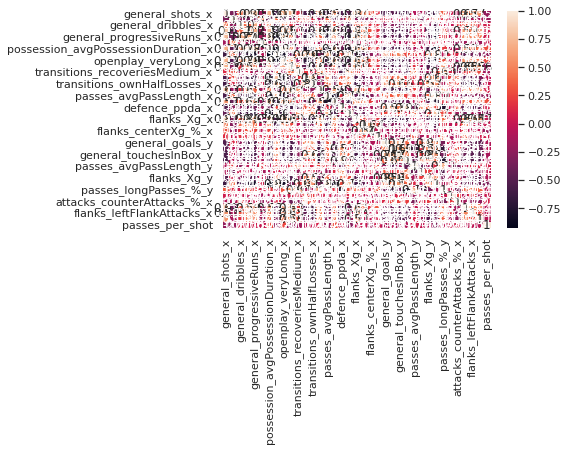

In [ ]:
sns.heatmap(top5_modelo2.corr(), annot=True)

> Os gráficos ajudam a entender os pesos das variáveis para o modelo

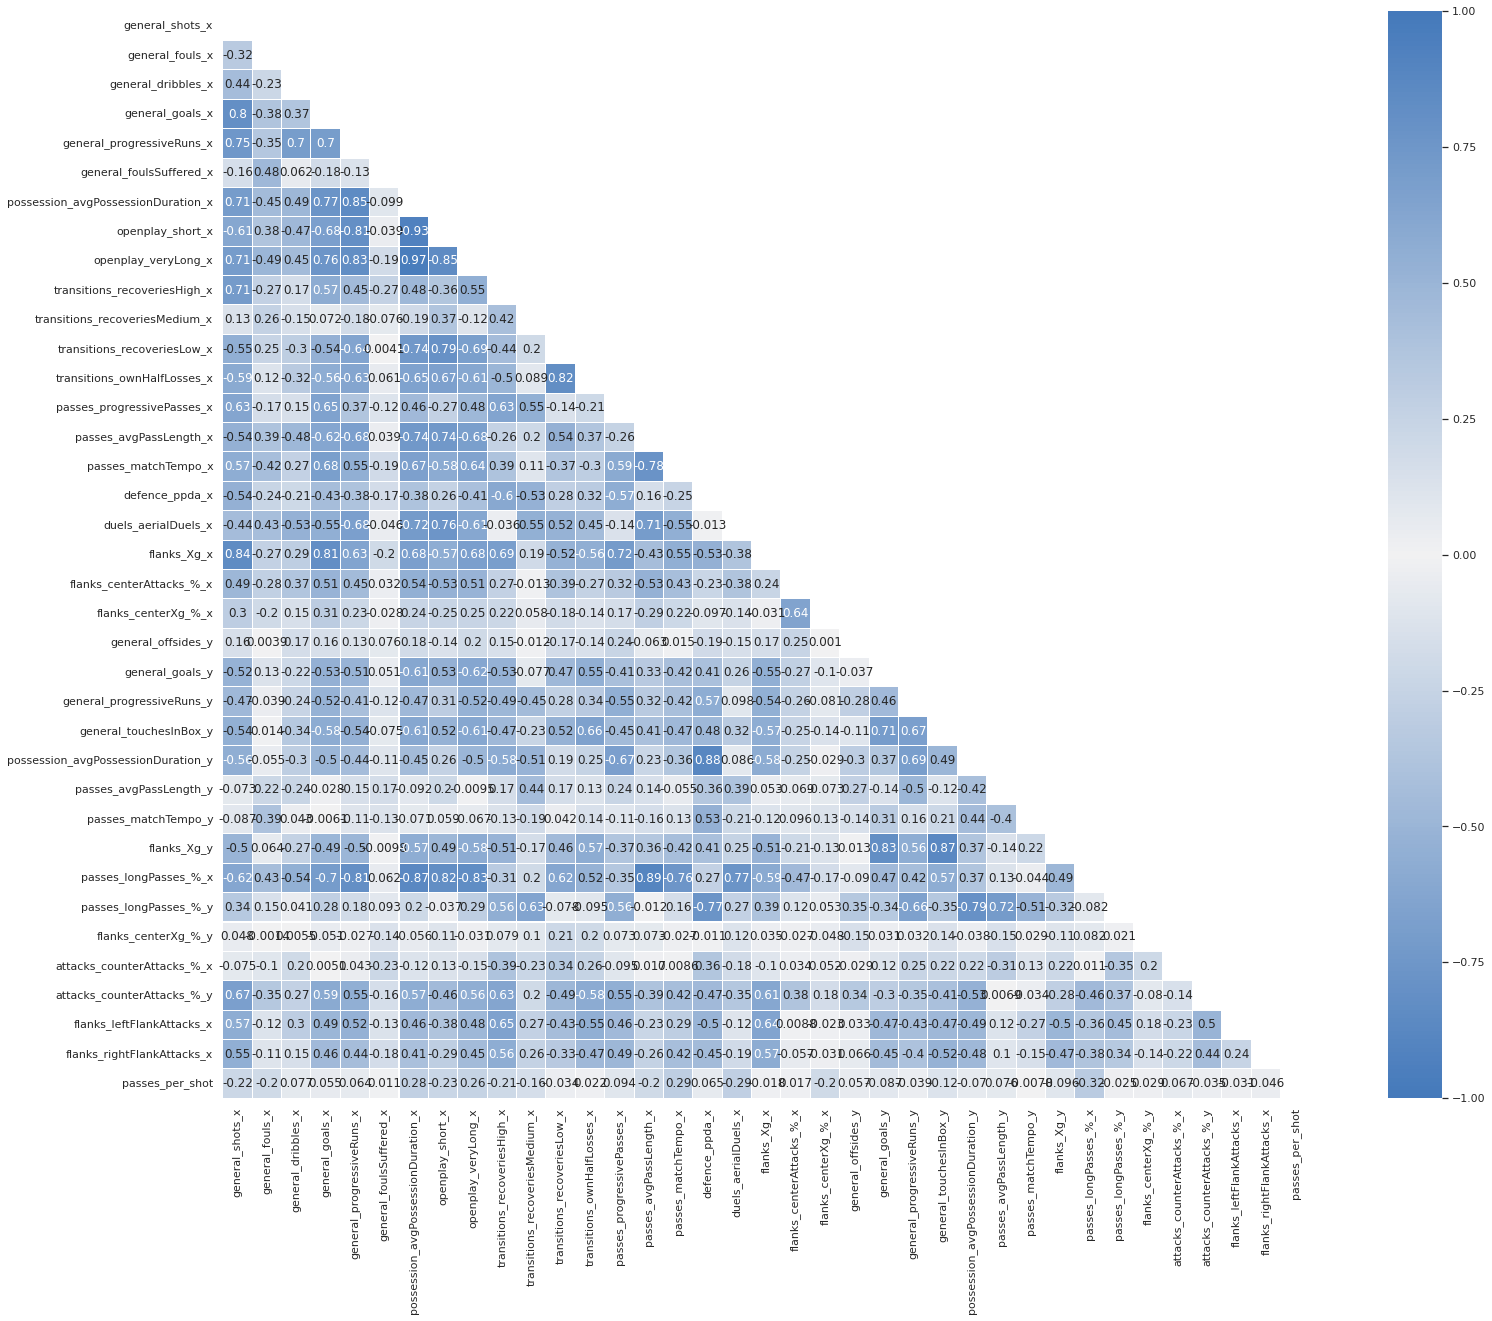

In [ ]:
cmap = sns.diverging_palette(250,250, as_cmap=True)
mask = np.zeros_like(top5_modelo2_corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(28, 20))
    ax = sns.heatmap(top5_modelo2_corr, vmin = -1, vmax = 1, annot=True, mask=mask, robust=True, square=True, cbar=True, linewidths=.01, cmap=cmap)

## Toda análise sobre os clusters será apresentada em documento a parte